In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
sdf = lambda q: sqldf(q, globals())

# Create the connection to the unzipped database
cnx  = sqlite3.connect(r'./data-oasis-ene-wind-solar-summary_00.db')

In [34]:
df = pd.read_sql("select report_data.data_item, report_data.value, report_header.uom, report_header.report, report_header.mkt_type, report_data.interval_start_gmt, report_data.interval_end_gmt from report_header inner join report_data on report_header.report_item_id = report_data.report_item_id;", cnx)
df['ts'] = pd.to_datetime(df['interval_start_gmt'])
df = df.set_index('ts')
df.drop(['interval_start_gmt'], axis=1, inplace=True)
df[0:5]

,data_item,value,uom,report,mkt_type,interval_end_gmt
ts,,,,,,
2016-11-15 07:00:00+00:00,DAM_FORECAST,364.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15T08:00:00-00:00
2016-11-15 07:00:00+00:00,DAM_NET_VIRTUAL,453.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15T08:00:00-00:00
2016-11-15 07:00:00+00:00,DAM_SCHEDULE,173.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15T08:00:00-00:00
2016-11-15 07:00:00+00:00,RTM_SCHEDULE,311.42,MW,ENE_WIND_SOLAR_SUMMARY,RTD,2016-11-15T08:00:00-00:00
2016-11-15 08:00:00+00:00,DAM_FORECAST,612.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15T09:00:00-00:00


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138354 entries, 2016-11-15 07:00:00+00:00 to 2019-10-01 06:00:00+00:00
Data columns (total 6 columns):
data_item           138354 non-null object
value               138354 non-null float64
uom                 138354 non-null object
report              138354 non-null object
mkt_type            138354 non-null object
interval_end_gmt    138354 non-null object
dtypes: float64(1), object(5)
memory usage: 7.4+ MB


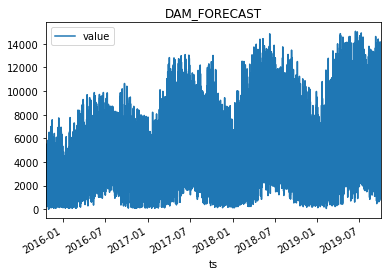

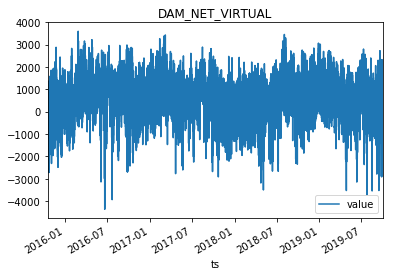

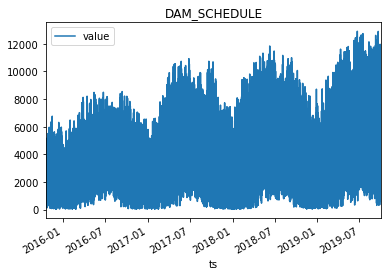

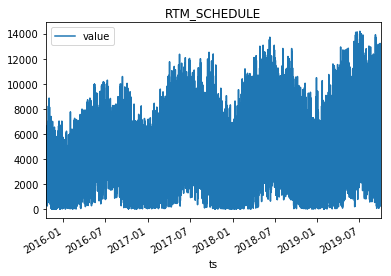

In [36]:
for title, group in df.groupby(['data_item']):
    group.plot.line(y='value', title=title)

In [37]:
df.dtypes

data_item            object
value               float64
uom                  object
report               object
mkt_type             object
interval_end_gmt     object
dtype: object

In [43]:
df1 = sdf("select ts, value from df where data_item = 'RTM_SCHEDULE';")
df1['ts'] = pd.to_datetime(df1['ts'])
df1 = df1.set_index('ts')
df1.head()

,value
ts,
2016-11-15 07:00:00,311.42
2016-11-15 08:00:00,383.00
2016-11-15 09:00:00,574.58
2016-11-15 10:00:00,761.17
2016-11-15 11:00:00,871.50


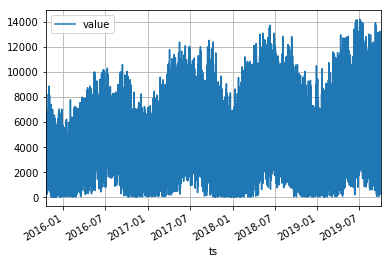

In [44]:
df1.plot(grid=True)

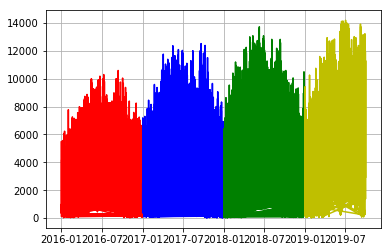

In [55]:
import datetime
d1 = datetime.datetime(2016,1,1)
d2 = datetime.datetime(2017,1,1)
d3 = datetime.datetime(2018,1,1)
d4 = datetime.datetime(2019,1,1)
d5 = datetime.datetime(2020,1,1)
y1 = df1[(d1 <= df1.index) & (df1.index < d2)]
y2 = df1[(d2 <= df1.index) & (df1.index < d3)]
y3 = df1[(d3 <= df1.index) & (df1.index < d4)]
y4 = df1[(d4 <= df1.index) & (df1.index < d5)]

fig, ax = plt.subplots()
ax.grid(True)
plt.plot(y1, c='r')
plt.plot(y2, c='b')
plt.plot(y3, c='g')
plt.plot(y4, c='y')